In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import alen, arange
import math
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

from sklearn.svm import SVR
#### PLS
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.signal import savgol_filter

In [2]:
#BPSO

def pls_optimise_components(X, y, npc):
 
    rmsecv = np.zeros(npc)
    for i in range(1,npc+1,1):
 
        # Simple PLS
        pls_simple = PLSRegression(n_components=i)
        # Fit
        pls_simple.fit(X, y)
        #cv = LeaveOneOut()
        cv=10
        # Cross-validation
        y_cv = cross_val_predict(pls_simple, X, y, cv=cv)
 
        # Calculate scores
        score = r2_score(y, y_cv)
        rmsecv[i-1] = np.sqrt(mean_squared_error(y, y_cv))
 
    # Find the minimum of ther RMSE and its location
    opt_comp, rmsecv_min = np.argmin(rmsecv),  rmsecv[np.argmin(rmsecv)]
 
    return (opt_comp+1, rmsecv_min)

def base_pls(X,y,n_components, return_model=False):
 
    # Simple PLS
    pls_simple = PLSRegression(n_components=n_components)
    # Fit
    pls_simple.fit(X, y)
    cv = 10
    # Cross-validation
    y_cv = cross_val_predict(pls_simple, X, y, cv=cv)
 
    # Calculate scores
    score = r2_score(y, y_cv)
    rmsecv = np.sqrt(mean_squared_error(y, y_cv))
 
    if return_model == False:
        return(y_cv, score, rmsecv)
    else:
        return(y_cv, score, rmsecv, pls_simple)
    
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Create an instance 
#reg = linear_model.LinearRegression

# Define objective function
def f_per_particle(m, alpha):
    """Computes for the objective function per particle

    Inputs
    ------
    m : numpy.ndarray
        Binary mask that can be obtained from BinaryPSO, will
        be used to mask features.
    alpha: float (default is 0.5)
        Constant weight for trading-off classifier performance
        and number of features

    Returns
    -------
    numpy.ndarray
        Computed objective function
    """
    
    total_features = dimensions
    # Get the subset of the features from the binary mask

    #X_sav = savgol_filter(X_train, 3, polyorder=2, deriv=1)

    if np.count_nonzero(m) == 0:
        X_subset = X_train
    else:
        X_subset = X_train[:,m==1]

    
 

    # #regr = make_pipeline(StandardScaler(), SVR())
    # #regr = make_pipeline(StandardScaler(), RandomForestRegressor(max_depth=5, random_state=1))
    # #regr = make_pipeline(StandardScaler(), SVR(C = 0.5, degree= 1, kernel= 'rbf',epsilon= 0.16))
    # #X1 = savgol_filter(X_subset, 3, polyorder=2, deriv=1)
    # reg1 = GradientBoostingRegressor(random_state=1)
    # #reg2 = RandomForestRegressor(random_state=1)
    # opt_comp, rmsecv_min = pls_optimise_components(X_subset, y_train_oleo, 8)
    # reg3 = PLSRegression(n_components=opt_comp)
    # #reg3 = PLSRegression(n_components=5)
    # #reg3 = LinearRegression()
    # ereg = VotingRegressor(estimators=[('gb', reg1), ('plsr', reg3)])
    # ereg = ereg.fit(X_subset, y_train_oleo)
    # #regr.fit(X_subset, y_train_oleo)
    # y_pred = cross_val_predict(ereg, X_subset, y_train_oleo, cv=10)
    # #y_pred = ereg.predict(X_subset)
    # #y_pred = regr.predict(X1)
    # #r2cv = mean_squared_error(y_train_oleo, y_pred)
    # r2cv = r2_score(y_train_oleo, y_pred)
    # P = r2cv
    # #P = (classifier.predict(X_subset) == y).mean()
    # # Compute for the objective function
    # j = (alpha * (1.0 - P)
    #     + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))



    opt_comp, rmsecv_min = pls_optimise_components(X_subset, y_train, 8)
    predicted, r2cv, rmscv = base_pls(X_subset, y_train, opt_comp)
    
    P = r2cv
    #P = (classifier.predict(X_subset) == y).mean()
    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))

    return j

def f(x, alpha=0.88):
    """Higher-level method to do classification in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
 
    return output_data

def msc(input_data):
     # mean centre correction
    for i in range(input_data.shape[0]):
        input_data[i,:] -= input_data[i,:].mean()
 
    # Get the reference spectrum. If not given, estimate it from the mean    

    # Calculate mean
    ref = np.mean(input_data, axis=0)

 
    # Define a new array and populate it with the corrected data    
    output_data= np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        # Run regression
        fit = np.polyfit(ref, input_data[i,:], 1, full=True)
        # Apply correction
        output_data[i,:] = (input_data[i,:] - fit[0][1]) / fit[0][0] 
    return output_data

In [3]:
X_train = pd.read_excel(open('Data/Wheat/wheatkernel.xlsx', 'rb'),
              sheet_name='calibration_X', header=None)
X_test = pd.read_excel(open('Data/Wheat/wheatkernel.xlsx', 'rb'),
              sheet_name='test_X', header=None)
y_train = pd.read_excel(open('Data/Wheat/wheatkernel.xlsx', 'rb'),
              sheet_name='calibration_Y', header=None)
y_test = pd.read_excel(open('Data/Wheat/wheatkernel.xlsx', 'rb'),
              sheet_name='test_Y', header=None)
#df = pd.read_csv('Data/Wheat/evt5_reference_data_fromHoneCreate.csv', sep=';')

In [4]:
#df.head()
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.479858,3.476058,3.472176,3.468331,3.464457,3.460572,3.456706,3.452831,3.449021,3.445266,...,3.304351,3.300280,3.296252,3.292211,3.288173,3.284211,3.280298,3.276471,3.272626,3.268861
1,3.278917,3.275375,3.271787,3.268191,3.264570,3.260946,3.257313,3.253652,3.249994,3.246374,...,3.081765,3.077966,3.074187,3.070431,3.066709,3.063015,3.059394,3.055775,3.052168,3.048617
2,3.294602,3.291299,3.287919,3.284469,3.280994,3.277485,3.273966,3.270439,3.266947,3.263488,...,3.095908,3.092150,3.088372,3.084617,3.080892,3.077198,3.073566,3.069950,3.066369,3.062792
3,3.255145,3.251761,3.248320,3.244840,3.241315,3.237757,3.234184,3.230631,3.227072,3.223516,...,3.068241,3.065193,3.062142,3.059107,3.056113,3.053168,3.050252,3.047370,3.044502,3.041626
4,3.311137,3.307559,3.303919,3.300265,3.296648,3.293071,3.289449,3.285809,3.282198,3.278666,...,3.140716,3.136864,3.133022,3.129227,3.125489,3.121748,3.118098,3.114458,3.110825,3.107219


In [5]:
print(X_train.shape)
print(X_test.shape)

(415, 100)
(108, 100)


In [9]:
df_y = y_train.append(y_test, ignore_index=True)
df_x = X_train.append(X_test, ignore_index=True)
df_y.describe()

,0
count,523.000000
mean,9.958228
std,1.604031
min,6.770000
25%,8.917875
50%,9.770000
75%,10.738593
max,16.950884


In [11]:
df_x.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,...,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,2.995909,2.993010,2.990086,2.987153,2.984218,2.981288,2.978372,2.975479,2.972611,2.969773,...,2.861539,2.858426,2.855327,2.852253,2.849211,2.846208,2.843245,2.840307,2.837378,2.834452
std,0.188013,0.187571,0.187123,0.186675,0.186226,0.185777,0.185331,0.184890,0.184457,0.184035,...,0.171266,0.170809,0.170357,0.169909,0.169468,0.169035,0.168611,0.168194,0.167786,0.167388
min,2.638791,2.636990,2.635159,2.633342,2.631548,2.629776,2.627980,2.626175,2.624344,2.622520,...,2.522153,2.519497,2.516825,2.514177,2.511523,2.508901,2.506269,2.503634,2.501001,2.498414
25%,2.843292,2.840652,2.838031,2.835476,2.832919,2.830409,2.827918,2.825463,2.823058,2.820655,...,2.722787,2.720385,2.717951,2.715295,2.712576,2.710034,2.707323,2.704371,2.701572,2.699050
50%,2.982492,2.979407,2.976281,2.973498,2.970721,2.967951,2.965202,2.962459,2.959708,2.956274,...,2.850924,2.847887,2.845430,2.842974,2.840542,2.837878,2.834984,2.832121,2.829268,2.826407
75%,3.128101,3.124765,3.121396,3.118045,3.114924,3.111825,3.108761,3.105748,3.102759,3.099569,...,2.984951,2.981271,2.977667,2.974121,2.970518,2.967026,2.964230,2.960958,2.957705,2.954436
max,3.502061,3.498685,3.495242,3.491803,3.488400,3.484926,3.481374,3.477843,3.474308,3.470836,...,3.334358,3.330844,3.327304,3.323814,3.320332,3.316877,3.313466,3.310083,3.306721,3.303349


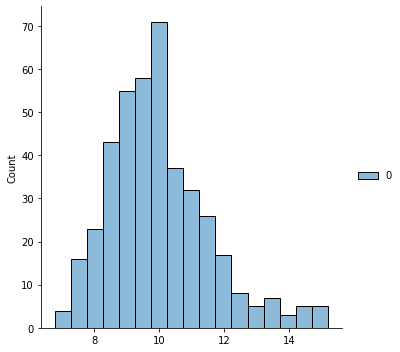

In [109]:
import seaborn as sns
sns.displot(y_train)

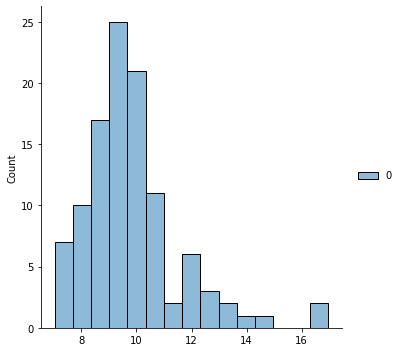

In [110]:
sns.displot(y_test)

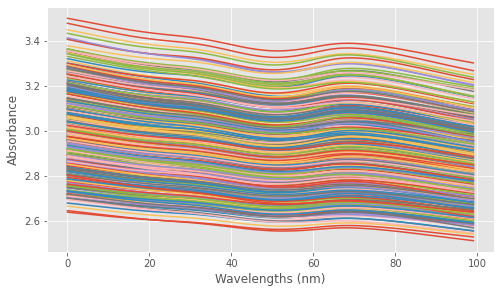

In [111]:
wl = np.arange(0, 100, 1)
plt.figure(figsize=(8, 4.5))
with plt.style.context('ggplot'):
    plt.plot(wl, X_train.values.T)
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("Absorbance")
    plt.show()

In [112]:
X_train = savgol_filter(X_train, 3, polyorder=2, deriv=1)
X_test = savgol_filter(X_test, 3, polyorder=2, deriv=1)

X_train = snv(X_train)
X_test = snv(X_test)

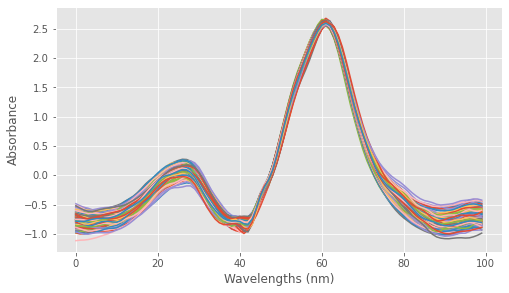

In [113]:
wl = np.arange(0, 100, 1)
plt.figure(figsize=(8, 4.5))
with plt.style.context('ggplot'):
    plt.plot(wl, X_train.T)
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("Absorbance")
    plt.show()

In [76]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



pca = PCA(n_components=5)
T = pca.fit_transform(X_train)
df_pca = pd.DataFrame(T)
df_pca.rename(columns={0: 'PC1', 1: 'PC2', 2: 'PC3', 3: 'PC4', 4: 'PC5'}, inplace=True)

print(pca.explained_variance_ratio_)


[0.72393526 0.13281835 0.07014732 0.01997479 0.01474766]


In [197]:
import plotly.express as px

fig = px.scatter(df_pca, x='PC1', y='PC2', render_mode='svg')

fig.show()

In [41]:
y_train.describe()

,0
count,415.000000
mean,9.989022
std,1.564924
min,6.770000
25%,8.940000
50%,9.800000
75%,10.800000
max,15.200000


In [42]:
# df_pretreat['class'] = 0
# for index, row in df_pretreat.iterrows():
#     if row['Umidade'] < 8:
#         df_pretreat.loc[index, 'class'] = 0
#     elif row['Umidade'] < 9:
#         df_pretreat.loc[index, 'class'] = 1
#     elif row['Umidade'] < 10:
#         df_pretreat.loc[index, 'class'] = 2
#     else:
#         df_pretreat.loc[index, 'class'] = 3

In [43]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split


# y = df_pretreat[['Umidade','Oleo','class']]
# ## Do not take the reference value and the class
# X = df_pretreat.values[:, :-2]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0,stratify=y['class'])

# col = [11, 14, 16, 19, 21, 22, 25, 27, 29, 30, 41, 42, 43, 48, 50, 53, 54,
#        55, 60, 63, 67, 85]
# X_train = (np.delete(X_train, col,1))
# X_test = (np.delete(X_test, col,1))


# col = [ 6, 25, 29, 32, 48, 55, 56, 63, 67, 72, 76]
# X_train = (np.delete(X_train, col,1))
# X_test = (np.delete(X_test, col,1))
# # X_train_snv = msc(X_train)
# # X_#test_snv = msc(X_test)

# y_train_oleo = y_train['Umidade']


# y_test_oleo = y_test['Umidade']

# #X1 = savgol_filter(X_train, 23, polyorder=2, deriv=2)
# #X2 = savgol_filter(X_test, 23, polyorder=2, deriv=2)

# # X_train_snv = msc(X_train)
# # X_test_snv = msc(X_test)

# # mean centre correction
# #X_mc = mc(X1)

# ##Standard Normal Variate

# # Xsnv = snv(X_train)

In [109]:
### Derive + SNV

# col = [9, 11, 15, 17, 18, 21, 23, 27, 29, 40, 41, 42, 46, 47, 51, 53, 54,
#        60, 62, 76, 95, 99]
# X_train = (np.delete(X_train, col,1))
# X_test = (np.delete(X_test, col,1))


# col = [7, 10, 19, 25, 29, 30, 33, 37, 39, 44, 45, 50]
# X_train = (np.delete(X_train, col,1))
# X_test = (np.delete(X_test, col,1))

# col = [14, 28, 29, 30, 37, 53, 58]
# X_train = (np.delete(X_train, col,1))
# X_test = (np.delete(X_test, col,1))

# col = [17, 18, 28, 39]
# X_train = (np.delete(X_train, col,1))
# X_test = (np.delete(X_test, col,1))

# col = [ 9, 15, 21, 33, 44]
# X_train = (np.delete(X_train, col,1))
# X_test = (np.delete(X_test, col,1))

# col = [ 2, 16, 22, 44, 47]
# X_train = (np.delete(X_train, col,1))
# X_test = (np.delete(X_test, col,1))

# col = [ 26,29]
# X_train = (np.delete(X_train, col,1))
# X_test = (np.delete(X_test, col,1))

# col = [ 40]
# X_train = (np.delete(X_train, col,1))
# X_test = (np.delete(X_test, col,1))
# # # X_train_snv = msc(X_train)
# # # X_#test_snv = msc(X_test)

# # y_train_oleo = y_train['Umidade']


# # y_test_oleo = y_test['Umidade']

# # #X1 = savgol_filter(X_train, 23, polyorder=2, deriv=2)
# # #X2 = savgol_filter(X_test, 23, polyorder=2, deriv=2)

# # # X_train_snv = msc(X_train)
# # # X_test_snv = msc(X_test)

# # # mean centre correction
# # #X_mc = mc(X1)

# # ##Standard Normal Variate

# # # Xsnv = snv(X_train)

In [114]:
### derive + SNV - new

col = [ 3, 12, 18, 24, 29, 34, 36, 41, 42, 43, 44, 53, 54, 55, 62, 65, 67,
       72, 77, 94, 97]
X_train = (np.delete(X_train, col,1))
X_test = (np.delete(X_test, col,1))

# col = [8, 17, 29, 34, 37, 40, 46, 48, 50, 78]
# X_train = (np.delete(X_train, col,1))
# X_test = (np.delete(X_test, col,1))

# col = [17, 19, 28, 32, 40, 43, 65]
# X_train = (np.delete(X_train, col,1))
# X_test = (np.delete(X_test, col,1))

# col = [35]
# X_train = (np.delete(X_train, col,1))
# X_test = (np.delete(X_test, col,1))


In [92]:
# Import PySwarms
import pyswarms as ps

# Initialize swarm, arbitrary
options = {'c1': 2, 'c2': 2, 'w':0.9, 'k': 20, 'p':2}

# Call instance of PSO
dimensions = X_train.shape[1] # dimensions should be the number of features

optimizer = ps.discrete.BinaryPSO(n_particles=20, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=100, verbose=2)
optimizer.reset()

2023-05-03 13:02:33,642 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 2, 'c2': 2, 'w': 0.9, 'k': 20, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0.0876
2023-05-03 13:13:59,486 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.0876477766586251, best pos: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [93]:
np.where(pos == 0)[0]

array([35], dtype=int64)

In [104]:
ls_score_pls = []
n_opt = 8
for i in range(3,9):
    pls_simple = PLSRegression(n_components=i)
    cv = LeaveOneOut()
    #cv = 10

    X1 = X_train 
    #X1 = X_train[:,pos==1] 

    X2 = X_test
    #X2 = X_test[:,pos==1] 


    # Fit
    pls_simple.fit(X1, y_train)


    # Cross-validation
    y_cv = cross_val_predict(pls_simple,X1, y_train, cv=cv)
    y_pred = pls_simple.predict(X2)
    score = r2_score(y_train, y_cv)
    if ls_score_pls:
        if score< ls_score_pls[-1] and i>4:
            n_opt =  i-1
            break

    ls_score_pls.append(score)

pls_simple = PLSRegression(n_components=n_opt)
cv = LeaveOneOut()
#cv = 10

X1 = X_train 
#X1 = X_train[:,pos==1] 

X2 = X_test
#X2 = X_test[:,pos==1] 


# Fit
pls_simple.fit(X1, y_train)


# Cross-validation
y_cv = cross_val_predict(pls_simple,X1, y_train, cv=cv)
y_pred = pls_simple.predict(X2)
# Calculate scores
score = r2_score(y_train, y_cv)
score_train = mean_squared_error(y_train, y_cv,squared=False)
score_test = mean_squared_error(y_test, y_pred,squared=False)

print('N comp: ', n_opt)
print('N W', X_train.shape)
print('R2: ', score)
print('RMSE train: ', score_train)
print('RMSE test: ', score_test)



N comp:  8
N W (415, 61)
R2:  0.9124990785258744
RMSE train:  0.4623552418736252
RMSE test:  0.4543455745810633


Sans suppression
N comp:  2
R2:  0.4596048499283586
RMSE train:  1.1490136651617
RMSE test:  1.3605876366740455

Avec pre-traitement
N comp:  7
R2:  0.8870491625687604
RMSE train:  0.5253082240394796
RMSE test:  0.44207644653216055

Avec optimisation

N comp:  10
R2:  0.9124025905955926
RMSE train:  0.46261009295377936
RMSE test:  0.41418291622270287

2e boucle

N comp:  10
R2:  0.9118266343944599
RMSE train:  0.46412844046600177
RMSE test:  0.3913216462659776


Derive + SNV

N comp:  8
N W (415, 100)
R2:  0.8943229845631394
RMSE train:  0.5081123397383713
RMSE test:  0.5065344520512033

1e boucle

N comp:  8
N W (415, 78)
R2:  0.9052339394569837
RMSE train:  0.4811670572619828
RMSE test:  0.5162251684801937

N comp:  8
N W (415, 66)
R2:  0.9085133726841861
RMSE train:  0.4727682266042632
RMSE test:  0.47195137798401277

N comp:  8
N W (415, 59)
R2:  0.9094785936895836
RMSE train:  0.47026766541038084
RMSE test:  0.42438779051435804

N comp:  8
N W (415, 55)
R2:  0.9100977295292939
RMSE train:  0.4686566700338566
RMSE test:  0.4291661151285659

N comp:  8
N W (415, 50)
R2:  0.9104929729641026
RMSE train:  0.4676253417458744
RMSE test:  0.4398464477850427

N comp:  8
N W (415, 45)
R2:  0.9130351632259351
RMSE train:  0.46093672894440607
RMSE test:  0.41037726351972004

N comp:  8
N W (415, 43)
R2:  0.9134794866132417
RMSE train:  0.4597577050669712
RMSE test:  0.41271440057186415

N comp:  8
N W (415, 42)
R2:  0.9136389104274913
RMSE train:  0.459333932024981
RMSE test:  0.41172877467291225



Derive + SNV - new

N comp:  8
N W (415, 79)
R2:  0.9080197982538791
RMSE train:  0.47404181397245787
RMSE test:  0.49205450288971947

N comp:  8
N W (415, 69)
R2:  0.9109483731112994
RMSE train:  0.4664342161897883
RMSE test:  0.5031293773262979

N comp:  8
N W (415, 62)
R2:  0.9147343826550586
RMSE train:  0.4564113573050644
RMSE test:  0.4024014334113302

N comp:  8
N W (415, 61)
R2:  0.9124990785258744
RMSE train:  0.4623552418736252
RMSE test:  0.4543455745810633

In [115]:
import plotly.express as px

df_pred = pd.DataFrame()
df_pred['y_ref_train'] = y_train
df_pred['y_pred_train'] = y_cv
fig = px.scatter(df_pred, x="y_ref_train", y="y_pred_train", trendline="ols", title="Prediction performance for protein content ",
                 labels={
                     "y_ref_train": "Protein content measured (%)",
                     "y_pred_train": "Protein content predicted (%)",

                 },width=600, height=400)
fig.show()

In [116]:

df_pred = pd.DataFrame()
df_pred['y_ref_test'] = y_test
df_pred['y_pred_test'] = y_pred
fig = px.scatter(df_pred, x="y_ref_test", y="y_pred_test", trendline="ols", title="Prediction performance for protein content ",
                 labels={
                     "y_ref_test": "Protein content measured (%)",
                     "y_pred_test": "Protein content predicted (%)",

                 },width=600, height=400)
fig.show()